In [6]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
mnist = fetch_openml('mnist_784')
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

In [27]:
mnist_data, mnist_target = mnist.data.values, mnist.target.values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(mnist_data, mnist_target, test_size=.1)

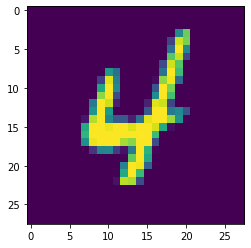

In [31]:
img = X_train[0].reshape(28, 28)
plt.imshow(img)

In [33]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def softmax(x):
  c = np.max(x)
  numerator = np.exp(x - c)
  denominator = np.sum(numerator)
  return numerator / denominator

In [32]:
def get_data():
  return train_test_split(mnist_data, mnist_target, test_size=.1)

def init_network():
  with open("sample_weight.pkl", 'rb') as f:
    network = pickle.load(f)
  return network

def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(X, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)

  return y

In [35]:
X_train, X_test, y_train, y_test = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(X_test.shape[0]):
  y = predict(network, X_test[i])
  pred = np.argmax(y)
  if y_test[i] == pred:
    accuracy_cnt += 1

print("Accuracy: "+str(float(accuracy_cnt) / X_test.shape[0]))

FileNotFoundError: ignored